<a href="https://colab.research.google.com/github/SamuelWanjiru/Loan_Eligibility/blob/main/Loan_Eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='blue'> Loan Eligibility Prediction 💰 </font>**

In this notebook, we are going to predict customers that are eligible for a loan and check the missing creterion to know why some customers are getting loans to build their own homes

## **Problem / task**

A company has contracted you to automate their loan eligibility process on a real time scenario based on the details a customer provides during the loan application process.

To achieve this, the following steps are applied:

<font color='blue'>

1.   Exploratory Data Analysis. 
2.   Data Visualizations.
3.   Machine Learning Model Decision.
1.   Model training & prediction.
2.   Model deployment.

</font>





## **Connecting/mounting the google drive**

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Importing the relevant data analysis libraries**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import pickle as pkl

### **Loading the dataset from google drive**

The dataset is subdivided into train and test.

In [10]:
loan_train_data = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Loan Eligibility/Data/loan-train.csv')
loan_test_data = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Loan Eligibility/Data/loan-test.csv')

### **Understanding the data**

In [9]:
# Displaying the 1st 5 observations of the train dataset
loan_train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# Displaying the 1st 5 observations of the test dataset
loan_test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [16]:
# Finding out the structure of the train dataset
print("Shape: ",loan_train_data.shape)

Shape:  (614, 13)


The train dataset has a total of 614 observations/entries and 13 columns.

In [15]:
# Finding out the structure of the test dataset
print("Shape:",loan_test_data.shape)

Shape: (367, 12)


The test dataset has a total of 367 observations/entries and 12 columns. The target variable (loan status) is not included in the test dataset.

Lets further print the train dataset columns as a list

In [18]:
loan_train_columns = loan_train_data.columns
loan_train_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Getting the data description**

In [19]:
loan_train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [20]:
# Checking the data types of every varaible

loan_train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Checking how values are distributed in the categorical datasets, for example gender.

In [21]:
def explore_object_type(df ,feature_name):
     
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [24]:
for featureName in loan_train_columns:
    if loan_train_data[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train_data, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


### **Checking and dealing with missing values**

In [26]:
# Listing the missing values for each variable in the train data.
loan_train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Visualizing the non-null values for each variable (length of every variable)

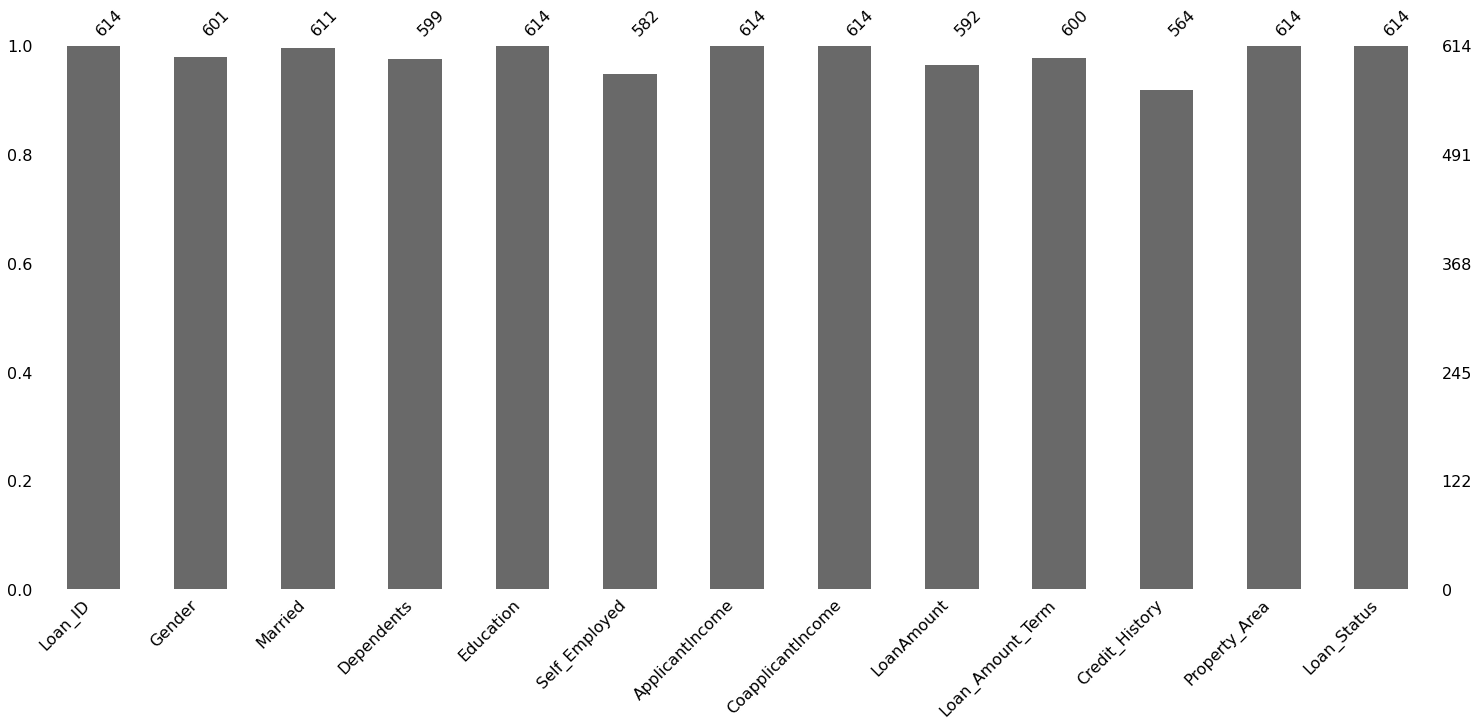

In [31]:
msno.bar(loan_train_data)
plt.show();

To deal with the missing values, we are going to use the mode and mean interpolation methods for Credit_History and LoanAmount for both train and test.

In [34]:
loan_train_data['Credit_History'].fillna(loan_train_data['Credit_History'].mode(), inplace=True) # Mode
loan_test_data['Credit_History'].fillna(loan_test_data['Credit_History'].mode(), inplace=True) # Mode


loan_train_data['LoanAmount'].fillna(loan_train_data['LoanAmount'].mean(), inplace=True) # Mean
loan_test_data['LoanAmount'].fillna(loan_test_data['LoanAmount'].mean(), inplace=True) # Mean


**Convert Categorical variable with Numerical values**

Loan_Status feature boolean values, So we replace Y values with 1 and N values with 0 and same for other Boolean types of columns

In [36]:
loan_train_data.Loan_Status = loan_train_data.Loan_Status.replace({"Y": 1, "N" : 0})

loan_train_data.Gender = loan_train_data.Gender.replace({"Male": 1, "Female" : 0})
loan_test_data.Gender = loan_test_data.Gender.replace({"Male": 1, "Female" : 0})

loan_train_data.Married = loan_train_data.Married.replace({"Yes": 1, "No" : 0})
loan_test_data.Married = loan_test_data.Married.replace({"Yes": 1, "No" : 0})

loan_train_data.Self_Employed = loan_train_data.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test_data.Self_Employed = loan_test_data.Self_Employed.replace({"Yes": 1, "No" : 0})

Dealing futher with missing values

In [38]:
loan_train_data['Gender'].fillna(loan_train_data['Gender'].mode()[0], inplace=True)
loan_test_data['Gender'].fillna(loan_test_data['Gender'].mode()[0], inplace=True)

loan_train_data['Dependents'].fillna(loan_train_data['Dependents'].mode()[0], inplace=True)
loan_test_data['Dependents'].fillna(loan_test_data['Dependents'].mode()[0], inplace=True)

loan_train_data['Married'].fillna(loan_train_data['Married'].mode()[0], inplace=True)
loan_test_data['Married'].fillna(loan_test_data['Married'].mode()[0], inplace=True)

Here, Property_Area, Dependents and Education have multiple values so now we can use LabelEncoder from sklearn package

In [42]:
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train_data[col] = le.fit_transform(loan_train_data[col])
    loan_test_data[col] = le.fit_transform(loan_test_data[col])

### **Data Visualizations**

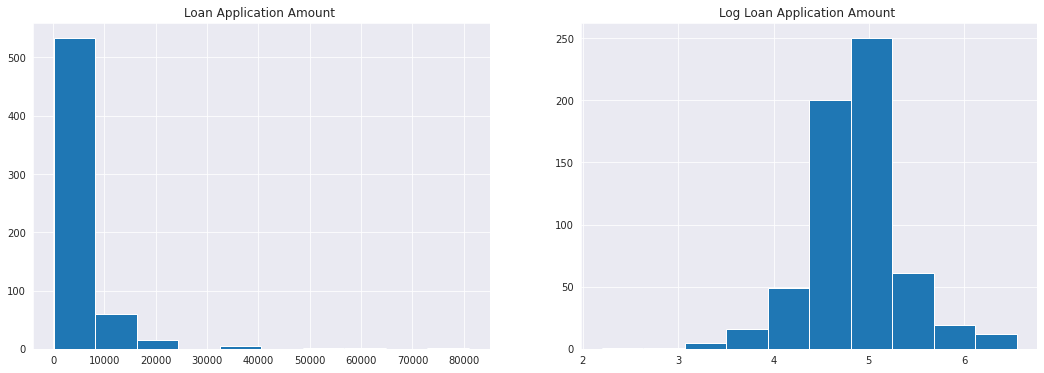

In [45]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train_data['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
# transforming the loan amount using a log transform
plt.hist(np.log(loan_train_data['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

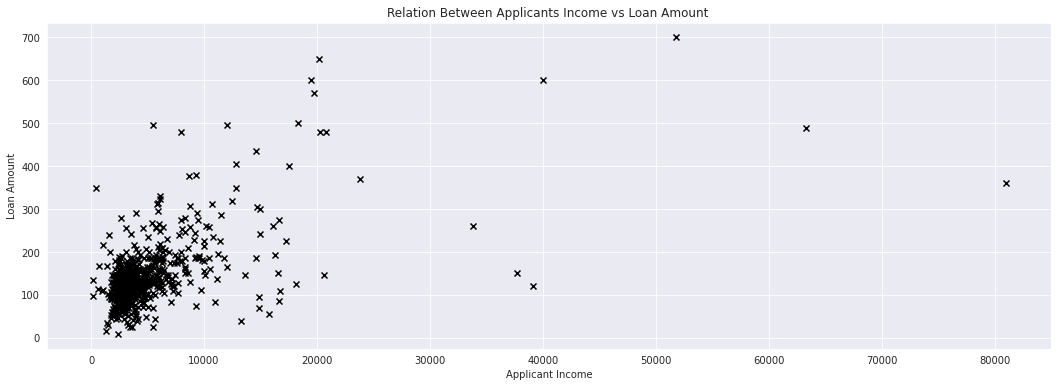

In [47]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicants Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train_data['ApplicantIncome'] , loan_train_data['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

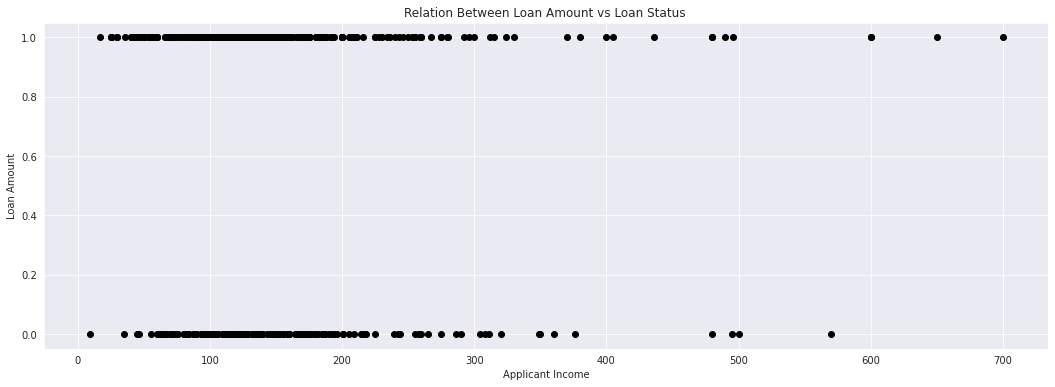

In [51]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Loan Amount vs Loan Status ")

plt.grid()
plt.scatter( loan_train_data['LoanAmount'], loan_train_data['Loan_Status'], c='k', marker='o')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

Checking for variable relationship

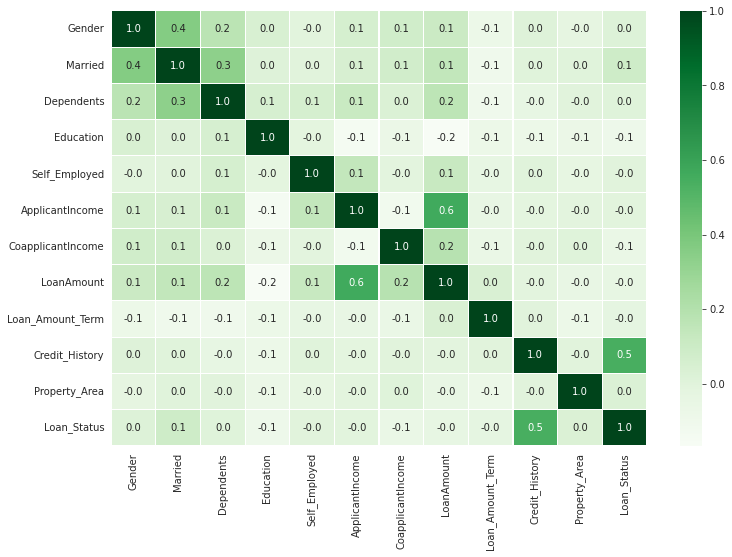

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train_data.corr(), cmap='Greens', annot=True, fmt='.1f', linewidths=.1)
plt.show()

### **Model Choosing**
The model chosen for this task is the logistic regression model.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Here is a brief overview of the logistic regression mode.

**Logistic Regression** is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, and True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable. 
More information can be found [here](https://en.wikipedia.org/wiki/Logistic_regression)

**Building the model**

In [56]:
logistic_model = LogisticRegression()

**Traing the ML Model**

To train the model, we are going to use Credit_History, Education and Gender features.

In [57]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train_data[train_features].values
y_train = loan_train_data['Loan_Status'].values

x_test = loan_test_data[train_features].values

**Fitting the model**

In [58]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

**Predicting loan status using the test dataset**

In [64]:
Predicted_Loan_Status = logistic_model.predict(x_test)
Predicted_Loan_Status

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [60]:
# Printing model coefficients
print('Coefficient of model :', logistic_model.coef_)


Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [61]:
# Printing the model intercept
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


### **Evaluating the model performance**

In [63]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2),'%')

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94 %


### **Model deployment**

The last step is to deploy our model in production map. So, we need to export our model and bind with web application API.

Using pickle we can export our model and store it to a logistic_model.pkl file, so we can easily access this file and calculate customize prediction using Web App API.

**Here is a brief overview of what pickle is:**

Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions. Find more information [here](hhttps://docs.python.org/3/library/pickle.html)

In [67]:
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary